# 동물보호관리시스템 유기동물 조회 서비스

<https://www.data.go.kr/dataset/15001096/openapi.do>

환경변수 여러 개를 한꺼번에 설정합니다.

반드시 Key, Token 등의 내용을 바꿔서 입력해 주세요.

```bash
# 1. 공공데이터포털
# Mac, Linux 또는 Windows Git Bash 등에선 다음과 같이 export를 사용하시면 됩니다.
export ANIMAL_API_KEY=abcdefghijklm%2FvSfZeu4FoGpl2eGP%2FzlR5eGh%2F9M8jbOv4HPFZI%2BM7ckZstS8OzkMKHNBkpAtdZX6T8VoRl4Q%3D%3D
# Windows 기본 환경에선 다음과 같이 set을 사용하세요.
set ANIMAL_API_KEY=abcdefghijklm%2FvSfZeu4FoGpl2eGP%2FzlR5eGh%2F9M8jbOv4HPFZI%2BM7ckZstS8OzkMKHNBkpAtdZX6T8VoRl4Q%3D%3D

# 2. LocationIQ
# Mac, Linux 또는 Windows Git Bash 등에선 다음과 같이 export를 사용하시면 됩니다.
export LOCATIONIQ_TOKEN=b023f593f83638
# Windows 기본 환경에선 다음과 같이 set을 사용하세요.
set LOCATIONIQ_TOKEN=b023f593f83638

# Jupyter Notebook 실행
jupyter notebook
```

환경 변수에서 API 키를 가져옵니다.

In [1]:
# 환경 변수에서 API 키 가져오기

import os
from urllib.parse import unquote

# 공공데이터포털에서 얻은 key는 unquote() 사용해야함
API_KEY = unquote(os.environ['ANIMAL_API_KEY'])
LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

## 라이브러리 사용

In [2]:
# requests 사용

import requests

requests.__version__

'2.22.0'

In [3]:
# Pandas 사용

import pandas as pd

pd.__version__

'0.24.2'

In [4]:
# Matplotlib 사용

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [5]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

In [6]:
# folium 패키지 설치

# !pip install folium

In [7]:
# folium 버전 확인

import folium

folium.__version__

'0.10.0'

In [8]:
# folium 라이브러리의 Map과 HeatMap 사용

from folium import Map
from folium.plugins import HeatMap

## 동물보호관리시스템 유기동물 조회 서비스 API 사용

많은 데이터를 다루기 위해 한꺼번에 만 개를 얻어오겠습니다.

In [9]:
# 동물보호관리시스템 유기동물 조회 서비스 API

# 원래 URL: http://openapi.animal.go.kr/.../abandonmentPublic?serviceKey=어쩌고&bgnde=20190901&...

# 이렇게 긴 URL을 물음표(?)를 기준으로 두 부분으로 나눕니다.

# 물음표(?) 앞부분
url = 'http://openapi.animal.go.kr/openapi/service/rest/abandonmentPublicSrvc/abandonmentPublic'

# 물음표(?) 뒷부분
payload = {
    'serviceKey': API_KEY,
    'bgnde': '20190901',
    'endde': '20190930',
    'numOfRows': 100,
}

# API 호출
response = requests.get(url, params=payload)

print(response)

<Response [200]>


In [10]:
# Response의 Text 길이 확인

len(response.text)

78782

표현에 주목해 보세요.
`reponse`는 응답이고, `response.text`는 응답 받은 내용입니다.
우리가 파싱해야 하는 대상은 `response.text`겠죠?

파싱을 하면 우리가 다루기 좋은 트리가 만들어집니다.

<https://en.wikipedia.org/wiki/Tree_(data_structure)>

컴퓨터의 폴더 구조가 전형적인 트리죠.

트리의 가장 중요한 특징은 우리가 뿌리를 통해 나무 전체를 다룰 수 있다는 겁니다.
예를 들어, Windows의 경우 `C:\`(C 드라이브 루트)에서 출발하면 모든 파일에 접근할 수 있죠.

In [11]:
# XML 데이터 파싱

import xml.etree.ElementTree as ET

root = ET.fromstring(response.text)

root

<Element 'response' at 0x0000023AF6903EA8>

XML에 있던 `<item>` 항목을 모두 얻어보겠습니다.

ElementTree는 파이썬의 Iterator를 활용해서 이 기능을 제공합니다.

<https://wiki.python.org/moin/Iterator>

Iterator는 글을 읽는 어린아이의 손가락 같은 역할을 합니다.
지금 가르킨 글자를 읽고 다음 글자로 넘어가죠.

In [12]:
# 첫번째 내용을 얻고 다음으로 넘어갑니다.

item = next(root.iter('item'))

# Item에 어떤 내용이 있는지 확인합니다.

list(item)

[<Element 'age' at 0x0000023AF6935688>,
 <Element 'careAddr' at 0x0000023AF69356D8>,
 <Element 'careNm' at 0x0000023AF6935728>,
 <Element 'careTel' at 0x0000023AF6935778>,
 <Element 'chargeNm' at 0x0000023AF69357C8>,
 <Element 'colorCd' at 0x0000023AF6935818>,
 <Element 'desertionNo' at 0x0000023AF6935868>,
 <Element 'filename' at 0x0000023AF69358B8>,
 <Element 'happenDt' at 0x0000023AF6935908>,
 <Element 'happenPlace' at 0x0000023AF6935958>,
 <Element 'kindCd' at 0x0000023AF69359A8>,
 <Element 'neuterYn' at 0x0000023AF69359F8>,
 <Element 'noticeEdt' at 0x0000023AF6935A48>,
 <Element 'noticeNo' at 0x0000023AF6935A98>,
 <Element 'noticeSdt' at 0x0000023AF6935AE8>,
 <Element 'officetel' at 0x0000023AF6935B38>,
 <Element 'orgNm' at 0x0000023AF6935B88>,
 <Element 'popfile' at 0x0000023AF6935BD8>,
 <Element 'processState' at 0x0000023AF6935C28>,
 <Element 'sexCd' at 0x0000023AF6935C78>,
 <Element 'specialMark' at 0x0000023AF6935CC8>,
 <Element 'weight' at 0x0000023AF6935D18>]

In [13]:
# <kindCd> 항목을 확인해 봅니다.
# 트리에서 바로 아래에 있는 걸 “자녀”라고 부릅니다.

child = item.find('kindCd')

print(child)

<Element 'kindCd' at 0x0000023AF69359A8>


In [14]:
# 자녀의 내용(text)을 확인해 봅니다.

print(child.text)

[개] 믹스견


In [15]:
# 이게 뭐였죠?

print(child.tag, child.text)

kindCd [개] 믹스견


XML은 key와 value를 다루는데 유용합니다.
파이썬의 Dictionary와 같죠.

데이터:

```text
이름: 홍길동
나이: 13세
```

파이썬:

```python
{
    'name': '홍길동',
    'age:' 13
}
```

XML:

```xml
<person>
    <name>홍길동</name>
    <age>13</age>
</person>
```

`person`, `name`, `age` 등이 태그(tag)에 해당합니다.

In [16]:
# item의 모든 자녀 확인

for child in item:
    print(child.tag, child.text)

age 2016(년생)
careAddr 경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원
careNm 태민동물병원
careTel 055-931-7975
chargeNm 박중언
colorCd 흰색
desertionNo 448548201900232
filename http://www.animal.go.kr/files/shelter/2019/09/201909260809844_s.jpg
happenDt 20190926
happenPlace 용주면 고품2구 부흥리
kindCd [개] 믹스견
neuterYn N
noticeEdt 20191007
noticeNo 경남-합천-2019-00284
noticeSdt 20190926
officetel 055-930-3562
orgNm 경상남도 합천군
popfile http://www.animal.go.kr/files/shelter/2019/09/201909260809844.jpg
processState 보호중
sexCd F
specialMark 활발하고 건강함
weight 10(Kg)


태그만 모아서 컬럼으로 활용합시다.

In [17]:
# 컬럼 목록 얻기

item = next(root.iter('item'))

columns = []

for child in item:
    columns.append(child.tag)

columns

['age',
 'careAddr',
 'careNm',
 'careTel',
 'chargeNm',
 'colorCd',
 'desertionNo',
 'filename',
 'happenDt',
 'happenPlace',
 'kindCd',
 'neuterYn',
 'noticeEdt',
 'noticeNo',
 'noticeSdt',
 'officetel',
 'orgNm',
 'popfile',
 'processState',
 'sexCd',
 'specialMark',
 'weight']

항상 최종 형태를 먼저 생각합니다.
테스트 코드로 쓰는 게 가장 좋고, 여의치 않다면 그에 준하는 모양을 간단히 잡아봅니다.

Pandas로 다루는 2차원 데이터는 Column과 Row의 조화를 통해 구성되죠.

Column은 이름이 있고, key-value 형태(`dictionary`)를 쓰면 매우 좋습니다.

Row는 그냥 `list`로 충분하죠.

즉, 데이터는 `dictionary`의 `list`가 됩니다.

```python
# item이 없을 때
rows = []

# item이 하나일 때
rows = [
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' }
]

# item이 여럿일 때
rows = [
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' },
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' },
    { 'age': '어쩌고', 'kindCd': '저쩌고', 'weight': '이런 식으로...' }
]
```

사실 2차원 데이터는 항상 이 모양이라고 보셔도 무방합니다.

In [18]:
# XML 데이터를 Pandas DataFrame으로 변환

# dictionary의 list를 준비합니다. 처음엔 0개죠.
rows = []

# item을 하나씩 rows에 넣을 겁니다.
for item in root.iter('item'):
    # 일단 row를 준비합니다. 단수형과 복수형을 구분해서 쓰니까 주의하세요.
    row = {}
    # item의 자녀를 하나씩 row에 넣을 겁니다.
    # 이런 코드가 나오면 앞에 나온 for는 잊어버리세요.
    # 지금부터 나오는 것에 집중하세요.
    for child in list(item):
        # dictionary는 key와 value를 함께 써서 추가 또는 변경합니다.
        # tag와 text가 헷갈리면 바로 위에 나온 ElementTree를 다시 확인하세요.
        # tag와 text는 보편적인 표현이 아닙니다.
        # A라는 폴더의 README.md 파일과 B라는 폴더의 README.md 파일은 이름이 같지만 전혀 다릅니다.
        # 어떤 게 들어있는지는 직접 열어보기 전에는 알 수 없습니다.
        # “모르는 것 발견 = 지금 당장 확인”을 습관으로 만드세요. 손은 눈보다 빠릅니다.
        row[child.tag] = child.text
    # 이렇게 블록이 끝나면 방금 있던 for를 잊으세요.
    # 우리가 얻은 건 item의 자녀 내용이 들어간 row죠.
    # 이제 이걸 rows(단수형과 복수형에 주의하세요)에 넣어줍니다.
    # list는 append를 썼죠?
    rows.append(row)

# dictionary의 list는 Pandas의 DataFrame으로 쉽게 변경 가능합니다.

df = pd.DataFrame(rows, columns=columns)

In [19]:
# 1. 컬럼 목록

df.columns

Index(['age', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'orgNm',
       'popfile', 'processState', 'sexCd', 'specialMark', 'weight'],
      dtype='object')

In [20]:
# 2. 전체 갯수와 컬럼 갯수 확인

df.shape

(100, 22)

In [21]:
# 3. 데이터 일부 확인

df.head()

,age,careAddr,careNm,careTel,chargeNm,colorCd,desertionNo,filename,happenDt,happenPlace,...,noticeEdt,noticeNo,noticeSdt,officetel,orgNm,popfile,processState,sexCd,specialMark,weight
0,2016(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,055-931-7975,박중언,흰색,448548201900232,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,용주면 고품2구 부흥리,...,20191007,경남-합천-2019-00284,20190926,055-930-3562,경상남도 합천군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,활발하고 건강함,10(Kg)
1,2017(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,055-931-7975,박중언,"갈색,흰색",448548201900231,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,용주면 고품2구 부흥리,...,20191007,경남-합천-2019-00283,20190926,055-930-3562,경상남도 합천군,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,F,사람을 잘따르고 온순함,8(Kg)
2,2018(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,055-648-7582,박정재,연갈색/크림색,448533201900660,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,한산도수산 근처,...,20191007,경남-통영-2019-00445,20190926,055-650-6252,경상남도 통영시,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"밧줄노끈 착용,굉장히 겁이 많음",7.7(Kg)
3,2019(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,055-648-7582,박정재,갈색/크림색/흰색,448533201900659,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,도천동 257-1,...,20191007,경남-통영-2019-00444,20190926,055-650-6252,경상남도 통영시,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"생후 7일령의 너무어린 자묘,출산한 모견과 합사/케어 중",0.09(Kg)
4,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,055-225-5483,진해구,흰색,448532201900789,http://www.animal.go.kr/files/shelter/2019/09/...,20190926,진해유기동물보호소,...,20191007,경남-창원3-2019-00458,20190926,055-225-5483,경상남도 창원시 진해구,http://www.animal.go.kr/files/shelter/2019/09/...,보호중,M,"1개월, 남매들이 다 닮음, 사람손길을 좋아하는 아이.",1.3(Kg)


In [22]:
# 컬럼별 결측값 갯수 확인

data = df.isnull().sum()

pd.DataFrame(data)

,0
age,0
careAddr,0
careNm,0
careTel,0
chargeNm,2
colorCd,0
desertionNo,0
filename,0
happenDt,0
happenPlace,0


In [23]:
# 안 쓰는 컬럼 이름을 넣어 drop해서 simple 데이터 만들기

simple_df = df.drop(columns=[
    'careTel', 'desertionNo', 'filename',
    'noticeEdt', 'noticeNo', 'noticeSdt', 'officetel', 'popfile'
])

# 정리된 데이터 확인

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight
0,2016(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,박중언,흰색,20190926,용주면 고품2구 부흥리,[개] 믹스견,N,경상남도 합천군,보호중,F,활발하고 건강함,10(Kg)
1,2017(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,박중언,"갈색,흰색",20190926,용주면 고품2구 부흥리,[개] 믹스견,N,경상남도 합천군,보호중,F,사람을 잘따르고 온순함,8(Kg)
2,2018(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,박정재,연갈색/크림색,20190926,한산도수산 근처,[개] 믹스견,N,경상남도 통영시,보호중,M,"밧줄노끈 착용,굉장히 겁이 많음",7.7(Kg)
3,2019(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,박정재,갈색/크림색/흰색,20190926,도천동 257-1,[고양이] 한국 고양이,N,경상남도 통영시,보호중,M,"생후 7일령의 너무어린 자묘,출산한 모견과 합사/케어 중",0.09(Kg)
4,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,흰색,20190926,진해유기동물보호소,[개] 믹스견,N,경상남도 창원시 진해구,보호중,M,"1개월, 남매들이 다 닮음, 사람손길을 좋아하는 아이.",1.3(Kg)


## 데이터 살펴보기

In [24]:
# 갯수 세기

data = simple_df['age'].value_counts()

pd.DataFrame(data)

,age
2019(년생),55
2018(년생),16
2017(년생),12
2016(년생),7
2015(년생),4
2014(년생),3
2009(년생),2
2011(년생),1


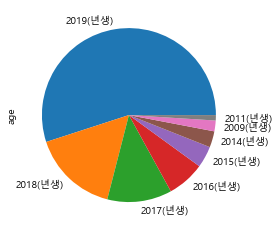

In [25]:
# 파이 그래프

data.plot.pie()

plt.show()

In [26]:
# 갯수 세기

data = simple_df['sexCd'].value_counts()

pd.DataFrame(data)

,sexCd
M,48
F,42
Q,10


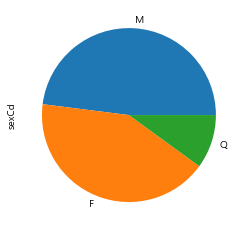

In [27]:
# 파이 그래프

data.plot.pie()

plt.show()

In [28]:
# 갯수 세기

data = simple_df['neuterYn'].value_counts()

pd.DataFrame(data)

,neuterYn
N,64
U,30
Y,6


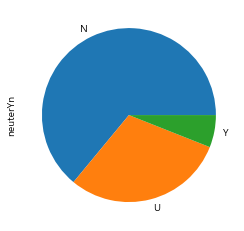

In [29]:
# 파이 그래프

data.plot.pie()

plt.show()

In [30]:
# 갯수 세기

data = simple_df['kindCd'].value_counts()

pd.DataFrame(data)

,kindCd
[개] 믹스견,53
[고양이] 한국 고양이,24
[개] 말티즈,4
[개] 푸들,3
[개] 진도견,3
[개] 웰시 코기 펨브로크,2
[고양이] 터키시 앙고라,1
[개] 비글,1
[개] 골든 리트리버,1
[개] 비숑 프리제,1


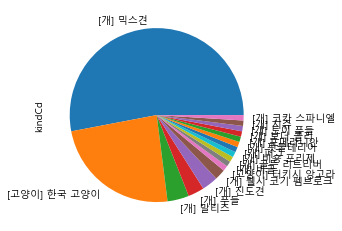

In [31]:
# 파이 그래프

data.plot.pie()

plt.show()

In [32]:
# 갯수 세기

data = simple_df['colorCd'].value_counts()

pd.DataFrame(data)

,colorCd
갈색,14
흰색,13
갈백,5
흰,5
검정색,4
검정,4
백,3
노랑,3
연갈색,3
백색,3


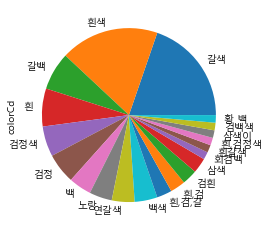

In [33]:
# 파이 그래프

# 데이터가 너무 많아서 20개로 제한
data = simple_df['colorCd'].value_counts().nlargest(20)

data.plot.pie()

plt.show()

In [34]:
# 갯수 세기

data = simple_df['happenDt'].value_counts()

pd.DataFrame(data)

,happenDt
20190926,100


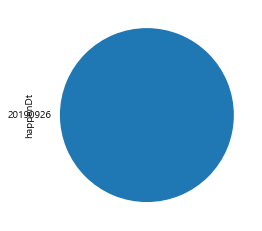

In [35]:
# 파이 그래프

data.plot.pie()

plt.show()

In [36]:
# 요일 구하기 (이 부분은 어렵습니다!)

DAYS = '일월화수목금토'

weekdays = []

for index in df.index:
    date = simple_df['happenDt'][index]
    # 2019년 9월 1일은 “일요일(0)”입니다.
    weekday = (int(date) - 20190901) % 7
    weekdays.append(DAYS[weekday])

simple_df = simple_df.assign(happenDay=weekdays)

simple_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay
0,2016(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,박중언,흰색,20190926,용주면 고품2구 부흥리,[개] 믹스견,N,경상남도 합천군,보호중,F,활발하고 건강함,10(Kg),목
1,2017(년생),"경상남도 합천군 합천읍 옥산로 16 (합천읍, 까치빌라) 태민동물병원",태민동물병원,박중언,"갈색,흰색",20190926,용주면 고품2구 부흥리,[개] 믹스견,N,경상남도 합천군,보호중,F,사람을 잘따르고 온순함,8(Kg),목
2,2018(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,박정재,연갈색/크림색,20190926,한산도수산 근처,[개] 믹스견,N,경상남도 통영시,보호중,M,"밧줄노끈 착용,굉장히 겁이 많음",7.7(Kg),목
3,2019(년생),경상남도 통영시 광도면 죽림3로 33 (광도면) 사랑애완동물병원,사랑애완동물병원,박정재,갈색/크림색/흰색,20190926,도천동 257-1,[고양이] 한국 고양이,N,경상남도 통영시,보호중,M,"생후 7일령의 너무어린 자묘,출산한 모견과 합사/케어 중",0.09(Kg),목
4,2019(년생),"경상남도 창원시 진해구 웅천로 218 (성내동, 농업기술센터) 205번지",진해유기동물보호소,진해구,흰색,20190926,진해유기동물보호소,[개] 믹스견,N,경상남도 창원시 진해구,보호중,M,"1개월, 남매들이 다 닮음, 사람손길을 좋아하는 아이.",1.3(Kg),목


In [37]:
# 갯수 세기

data = simple_df['happenDay'].value_counts()

pd.DataFrame(data)

,happenDay
목,100


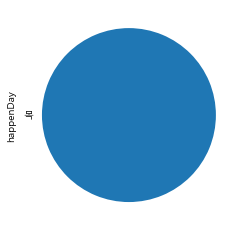

In [38]:
# 파이 그래프

data.plot.pie()

plt.show()

## 위도, 경도 얻기

반복적으로 써야 하니 함수를 만듭니다.

In [39]:
def geocode(address):
    url = 'https://us1.locationiq.com/v1/search.php'
    payload = {
        'key': LOCATIONIQ_TOKEN,
        'q': address,
        'format': 'json'
    }
    response = requests.get(url, params=payload)
    results = response.json()
    if 'error' in results:
        return None, None
    coordinates = results[0]
    return coordinates['lat'], coordinates['lon']

In [40]:
geocode('서울창업허브')

('37.54662875', '126.949684293519')

In [41]:
geocode('수원역')

('37.2658513', '127.000004233556')

In [42]:
# API 호출 및 지도에 표시하는 작업을 원활히 하기 위해 자료를 50개로 제한해서 sample 데이터를 만듭니다.

sample_df = simple_df.sample(n=50, random_state=1)

sample_df.shape

(50, 15)

In [43]:
# 위도, 경도 얻기

lats = []
lngs = []

for i, index in enumerate(sample_df.index):
    #print(i + 1, '-', index)
    lat, lng = geocode(sample_df['orgNm'][index])
    lats.append(lat or 0)
    lngs.append(lng or 0)

sample_df = sample_df.assign(lat=lats, lng=lngs)

sample_df.head()

,age,careAddr,careNm,chargeNm,colorCd,happenDt,happenPlace,kindCd,neuterYn,orgNm,processState,sexCd,specialMark,weight,happenDay,lat,lng
80,2017(년생),"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",펫토피아동물병원,이소영,백색,20190926,금광동 3956,[개] 말티즈,N,경기도 성남시,보호중,M,꼬리 끝 주황색으로 염색 되어 있음.,3.3(Kg),목,37.4201556,127.1262092
84,2019(년생),경기도 수원시 팔달구 중부대로42번길 9 (인계동) 한성동물병원,한성동물병원,수원시,백황,20190926,밤밭고가차도,[고양이] 한국 고양이,U,경기도 수원시,보호중,F,밤밭고가차도위,0.6(Kg),목,37.2633325,127.0287472
33,2019(년생),"충청남도 서산시 안견로 312 (읍내동, 서원빌딩) 1층",성심동물의료센터,최기항,"검, 갈, 흰색 트리플",20190926,한울타리요양원 마당,[고양이] 한국 고양이,N,충청남도 서산시,보호중,Q,"콧물, 기침, 기립불능, 식욕부진, 많이 야윔",0.9(Kg),목,36.784499,126.450317
81,2014(년생),"경기도 성남시 분당구 불정로 266 (수내동, 유신제일조합)",펫토피아동물병원,이소영,백갈색,20190926,성남동 4117-1,[고양이] 한국 고양이,Y,경기도 성남시,보호중,M,"다리부상, 교통사고 추정, 갈색 목줄 착용.",7.3(Kg),목,37.4201556,127.1262092
93,2019(년생),울산광역시 남구 돋질로 232 (달동) 1층,강남동물병원,방효빈,삼색,20190926,남구 효성 2공장내,[고양이] 한국 고양이,N,울산광역시 남구,보호중,M,"호흡기질환,탈수증상,기력없슴",0.40(Kg),목,35.49879045,129.345857526943


## 지도 그리기

위도/경도 데이터를 얻었기 때문에 지도에 그려볼 수 있습니다.

In [44]:
# 위도, 경도만 모읍니다.

coordinates = sample_df[['lat', 'lng']]

coordinates

,lat,lng
80,37.4201556,127.1262092
84,37.2633325,127.0287472
33,36.784499,126.450317
81,37.4201556,127.1262092
93,35.49879045,129.345857526943
17,36.0189315,129.3429384
36,36.6421169,127.4891742
82,37.4201556,127.1262092
69,36.9924966,127.1127168
65,36.9924966,127.1127168


In [45]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [46]:
# 지도 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map